# 09.10

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import joblib

df = pd.read_csv('diabetes_data.csv')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             1000 non-null   int64 
 1   Gender          1000 non-null   object
 2   Blood_Pressure  1000 non-null   int64 
 3   Cholesterol     1000 non-null   int64 
 4   Diabetes        1000 non-null   object
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


,Age,Gender,Blood_Pressure,Cholesterol,Diabetes
0,76,Female,110,168,Yes
1,56,Female,119,182,Yes
2,64,Female,101,186,Yes
3,80,Female,109,183,Yes
4,78,Female,107,172,Yes
...,...,...,...,...,...
995,56,Female,145,305,Yes
996,47,Female,157,263,Yes
997,51,Female,150,288,Yes
998,32,Female,124,343,Yes


In [68]:
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

<Axes: xlabel='Blood_Pressure', ylabel='Count'>

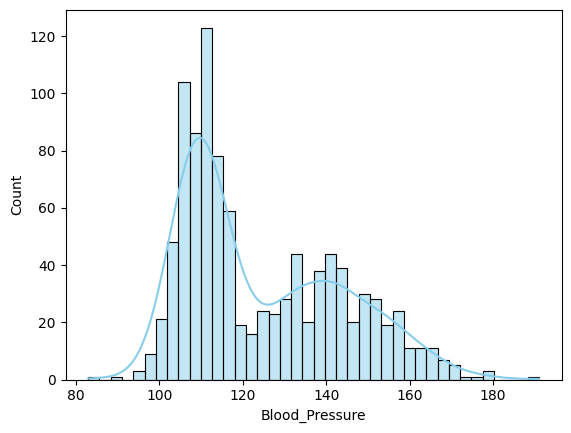

In [69]:
sns.histplot(df['Blood_Pressure'], bins=40, kde=True, color="skyblue")

<Axes: xlabel='Cholesterol', ylabel='Count'>

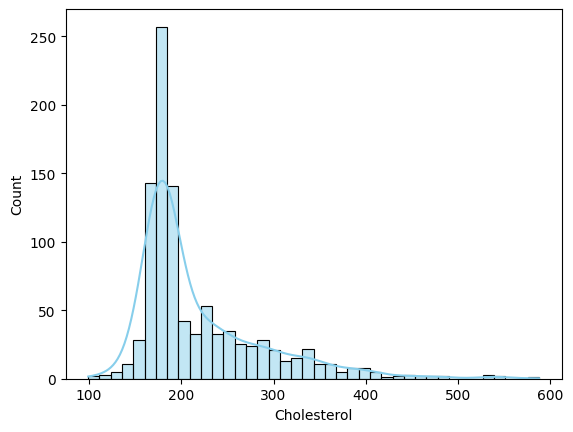

In [70]:
sns.histplot(df['Cholesterol'], bins=40, kde=True, color="skyblue")

In [71]:
# Min_Max scaling
# from sklearn.preprocessing import MinMaxScaler
# from scipy.stats import boxcox

# 오른쪽으로 치우쳐있기 때문에 로그변환을 실행
# df['Cholesterol'] = np.log1p(df['Cholesterol'])  # log(1+x) → 0값도 처리 가능
# 데이터 값이 전부 양수이고 정규분포에 가깝게 만들기 위해 Box-Cox변환을 실행

# df['Cholesterol'], fitted_lambda = boxcox(df['Cholesterol'])
# df['Blood_Pressure'], fitted_lambda = boxcox(df['Blood_Pressure'])

<Axes: xlabel='Blood_Pressure', ylabel='Count'>

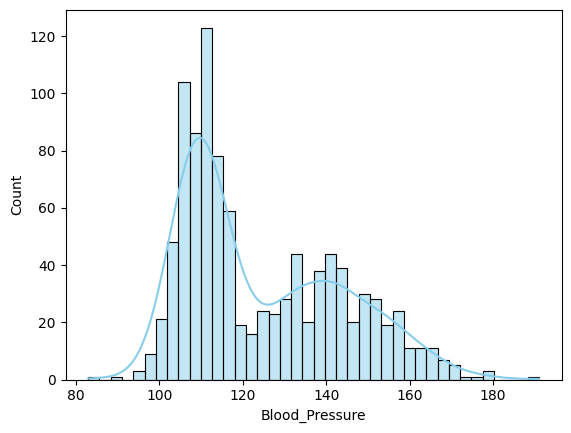

In [72]:
sns.histplot(df['Blood_Pressure'], bins=40, kde=True, color="skyblue")

<Axes: xlabel='Cholesterol', ylabel='Count'>

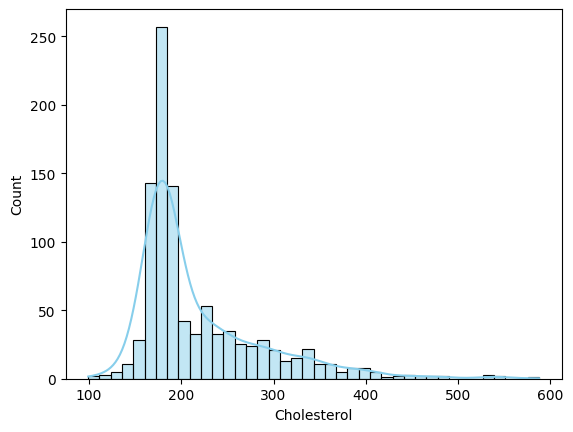

In [73]:
sns.histplot(df['Cholesterol'], bins=40, kde=True, color="skyblue")

In [74]:
# minmax 정규화
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['Blood_Pressure','Cholesterol']] = scaler.fit_transform(df[['Blood_Pressure','Cholesterol']])
df.head()
joblib.dump(scaler,'blood_cholesterol.scaler')

['blood_cholesterol.scaler']

<Axes: ylabel='Count'>

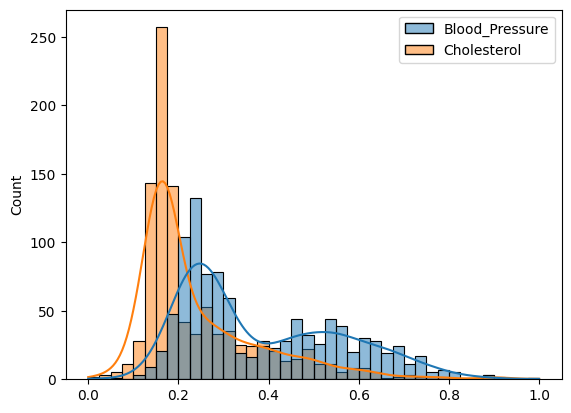

In [75]:
sns.histplot(df[['Blood_Pressure','Cholesterol']], bins=40, kde=True, color="skyblue")

In [76]:
X = df.drop('Diabetes', axis=1)
y = df['Diabetes'].map({'Yes':1, 'No':0})
print(X)
print(y)

     Age  Gender  Blood_Pressure  Cholesterol
0     76       0        0.250000     0.141104
1     56       0        0.333333     0.169734
2     64       0        0.166667     0.177914
3     80       0        0.240741     0.171779
4     78       0        0.222222     0.149284
..   ...     ...             ...          ...
995   56       0        0.574074     0.421268
996   47       0        0.685185     0.335378
997   51       0        0.620370     0.386503
998   32       0        0.379630     0.498978
999   44       1        0.407407     0.492843

[1000 rows x 4 columns]
0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: Diabetes, Length: 1000, dtype: int64


In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 4)
(200, 4)
(800,)
(200,)


# 1. 의사결정트리

In [78]:
# 모델 선정(의사결정트리)
from sklearn.tree import DecisionTreeClassifier
model_DecisionTree = DecisionTreeClassifier(random_state=11)
# 학습
model_DecisionTree.fit(X_train, y_train)
# 예측
y_pred = model_DecisionTree.predict(X_test)
# 결과 분석
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 37   3]
 [  4 156]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.91        40
           1       0.98      0.97      0.98       160

    accuracy                           0.96       200
   macro avg       0.94      0.95      0.95       200
weighted avg       0.97      0.96      0.97       200



# 2. KNN

In [79]:
# 모델 선정(랜덤포레스트)
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(n_neighbors=9)
# 학습
model_KNN.fit(X_train, y_train)
# 예측
y_pred = model_KNN.predict(X_test)
# 결과 분석
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 22  18]
 [ 12 148]]
              precision    recall  f1-score   support

           0       0.65      0.55      0.59        40
           1       0.89      0.93      0.91       160

    accuracy                           0.85       200
   macro avg       0.77      0.74      0.75       200
weighted avg       0.84      0.85      0.85       200



# 3. SVM

In [85]:
# 모델 선정(SVM)
from sklearn.calibration import CalibratedClassifierCV
from sklearn import svm
model_svm = svm.SVC(C=10, kernel='linear', gamma=0.01, random_state=11)
# 학습
model_svm.fit(X_train, y_train)
calibrated = CalibratedClassifierCV(model_svm, method='sigmoid', cv=5)
calibrated.fit(X_train, y_train)
# 예측
d = pd.DataFrame([{'Age': 30,
            'Gender': 0, 
            'Blood_Pressure': 150, 
            'Cholesterol': 200}])
print(d)
scaler = joblib.load('blood_cholesterol.scaler')
d[['Blood_Pressure','Cholesterol']] = scaler.transform(d[['Blood_Pressure','Cholesterol']])
print(d)
y_pred = calibrated.predict(d)
# # 결과 분석
print(y_pred)
# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))

   Age  Gender  Blood_Pressure  Cholesterol
0   30       0             150          200
   Age  Gender  Blood_Pressure  Cholesterol
0   30       0         0.62037     0.206544
[1]


# 4. 로지스틱 회귀

In [81]:
# 모델 선정(SVM)
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression()
# 학습
model_LR.fit(X_train, y_train)
# 예측
y_pred = model_LR.predict(X_test)
# 결과 분석
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 31   9]
 [  3 157]]
              precision    recall  f1-score   support

           0       0.91      0.78      0.84        40
           1       0.95      0.98      0.96       160

    accuracy                           0.94       200
   macro avg       0.93      0.88      0.90       200
weighted avg       0.94      0.94      0.94       200



# 5. 랜덤포레스트

In [82]:
# 모델 선정(랜덤포레스트)
from sklearn.ensemble import RandomForestClassifier
model_RandomForest = RandomForestClassifier(n_estimators=50, max_depth=3, random_state=11)
# 학습
model_RandomForest.fit(X_train, y_train)
# 예측
y_pred = model_RandomForest.predict(X_test)
# 결과 분석
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 29  11]
 [  2 158]]
              precision    recall  f1-score   support

           0       0.94      0.72      0.82        40
           1       0.93      0.99      0.96       160

    accuracy                           0.94       200
   macro avg       0.94      0.86      0.89       200
weighted avg       0.94      0.94      0.93       200



In [83]:
# 모델 저장
joblib.dump(calibrated, 'diabetes_model.pkl')

['diabetes_model.pkl']

In [84]:
import numpy as np
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

def compare_models(X_train, X_test, y_train, y_test):
    """
    여러 모델을 비교하고 최적의 하이퍼파라미터를 찾는 함수

    Parameters:
    X_train, X_test: 학습 및 테스트 특성 데이터
    y_train, y_test: 학습 및 테스트 레이블 데이터

    Returns:
    best_model: 최적의 모델
    results_df: 모델 비교 결과
    """

    # 1. 모델과 하이퍼파라미터 정의
    models = {
        'Logistic Regression': {
            'model': LogisticRegression(),
            'params': {
                'C': [0.001, 0.01, 0.1, 1, 10],
                'max_iter': [1000]
            }
        },
        'Decision Tree': {
            'model': DecisionTreeClassifier(),
            'params': {
                'max_depth': [3, 5, 7, 10],
                'min_samples_split': [2, 5, 10]
            }
        },
        'Random Forest': {
            'model': RandomForestClassifier(),
            'params': {
                'n_estimators': [100, 200],
                'max_depth': [3, 5, 7],
                'min_samples_split': [2, 5]
            }
        },
        'SVM': {
            'model': SVC(),
            'params': {
                'C': [0.1, 1, 10],
                'kernel': ['rbf', 'linear']
            }
        },
        'KNN': {
            'model': KNeighborsClassifier(),
            'params': {
                'n_neighbors': [3, 5, 7, 9],
                'weights': ['uniform', 'distance']
            }
        }
    }

    # 2. 각 모델별로 GridSearchCV 수행
    results = []
    best_score = 0
    best_model = None

    for name, model_info in models.items():
        grid_search = GridSearchCV(
            model_info['model'],
            model_info['params'],
            cv=5,
            scoring='accuracy',
            n_jobs=-1
        )

        # 모델 학습
        grid_search.fit(X_train, y_train)

        # 테스트 세트로 성능 평가
        y_pred = grid_search.predict(X_test)
        test_score = accuracy_score(y_test, y_pred)

        # 결과 저장
        results.append({
            'Model': name,
            'Best Parameters': grid_search.best_params_,
            'Cross-val Score': grid_search.best_score_,
            'Test Score': test_score
        })

        # 최고 성능 모델 저장
        if test_score > best_score:
            best_score = test_score
            best_model = grid_search.best_estimator_

    # 결과를 데이터프레임으로 변환
    results_df = pd.DataFrame(results)

    return best_model, results_df

# 사용 예시
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 비교 실행
best_model, results = compare_models(X_train, X_test, y_train, y_test)

# 결과 출력
print("\n모델 비교 결과:")
print(results)

print("\n최적 모델 성능 보고서:")
print(best_model)
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))


모델 비교 결과:
                 Model                                    Best Parameters  \
0  Logistic Regression                        {'C': 10, 'max_iter': 1000}   
1        Decision Tree           {'max_depth': 7, 'min_samples_split': 2}   
2        Random Forest  {'max_depth': 7, 'min_samples_split': 2, 'n_es...   
3                  SVM                      {'C': 10, 'kernel': 'linear'}   
4                  KNN          {'n_neighbors': 3, 'weights': 'distance'}   

   Cross-val Score  Test Score  
0          0.95000       0.950  
1          0.93375       0.945  
2          0.95375       0.960  
3          0.95125       0.965  
4          0.87750       0.865  

최적 모델 성능 보고서:
SVC(C=10, kernel='linear')
              precision    recall  f1-score   support

           0       0.88      0.91      0.89        32
           1       0.98      0.98      0.98       168

    accuracy                           0.96       200
   macro avg       0.93      0.94      0.94       200
weighted avg  